# Change Working Directory

In [ ]:
import os
os.chdir('D:\\DOCUMENTS\\ALEXA REVIEW')

# Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')#plotting style
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
#model building and splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



#  Loading Dataset

In [ ]:
df= pd.read_csv("amazon_alexa.tsv",sep='\t')

In [ ]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


#  Data cleaning and Preprocessing


In [ ]:
# getting the shape of the data
df.shape

(3150, 5)

In [ ]:
df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
# describing the data set
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
# checking if there is any null data or not
df.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

rating [5 4 3 2 1]
date ['31-Jul-18' '30-Jul-18' '29-Jul-18' '28-Jul-18' '27-Jul-18' '26-Jul-18'
 '25-Jul-18' '24-Jul-18' '23-Jul-18' '22-Jul-18' '21-Jul-18' '20-Jul-18'
 '19-Jul-18' '18-Jul-18' '17-Jul-18' '16-Jul-18' '15-Jul-18' '14-Jul-18'
 '13-Jul-18' '12-Jul-18' '11-Jul-18' '10-Jul-18' '9-Jul-18' '8-Jul-18'
 '7-Jul-18' '6-Jul-18' '5-Jul-18' '4-Jul-18' '3-Jul-18' '2-Jul-18'
 '1-Jul-18' '30-Jun-18' '29-Jun-18' '28-Jun-18' '27-Jun-18' '26-Jun-18'
 '25-Jun-18' '24-Jun-18' '23-Jun-18' '22-Jun-18' '21-Jun-18' '20-Jun-18'
 '19-Jun-18' '18-Jun-18' '17-Jun-18' '16-Jun-18' '15-Jun-18' '14-Jun-18'
 '13-Jun-18' '12-Jun-18' '11-Jun-18' '10-Jun-18' '9-Jun-18' '8-Jun-18'
 '7-Jun-18' '6-Jun-18' '5-Jun-18' '4-Jun-18' '3-Jun-18' '2-Jun-18'
 '1-Jun-18' '31-May-18' '30-May-18' '29-May-18' '28-May-18' '27-May-18'
 '26-May-18' '25-May-18' '24-May-18' '23-May-18' '22-May-18' '21-May-18'
 '20-May-18' '19-May-18' '18-May-18' '17-May-18' '16-May-18']
variation ['Charcoal Fabric ' 'Walnut Finish ' 'Heather 

In [ ]:
# adding a length column for analyzing the length of the reviews
df['length'] = df['verified_reviews'].apply(len)
df.head(5)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:

df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [ ]:
df["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
df["length"].value_counts()

1      81
11     48
13     44
8      41
18     37
       ..
395     1
326     1
398     1
321     1
353     1
Name: length, Length: 490, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='rating', ylabel='count'>

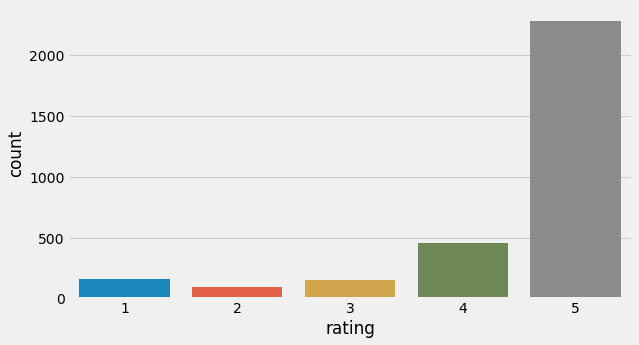

In [ ]:
sns.countplot(x='rating',data=df)

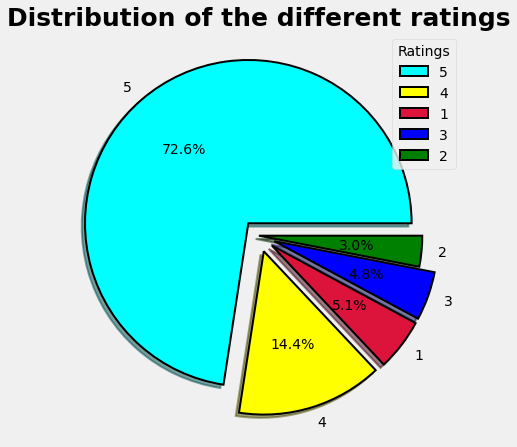

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("cyan","yellow","crimson","blue","green")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0
        )
tags=df['rating'].value_counts()
tags.plot(kind='pie',autopct="%1.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the different ratings',fontsize='25',fontweight='bold')
plt.show()

In [ ]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

Text(0, 0.5, 'Variation')

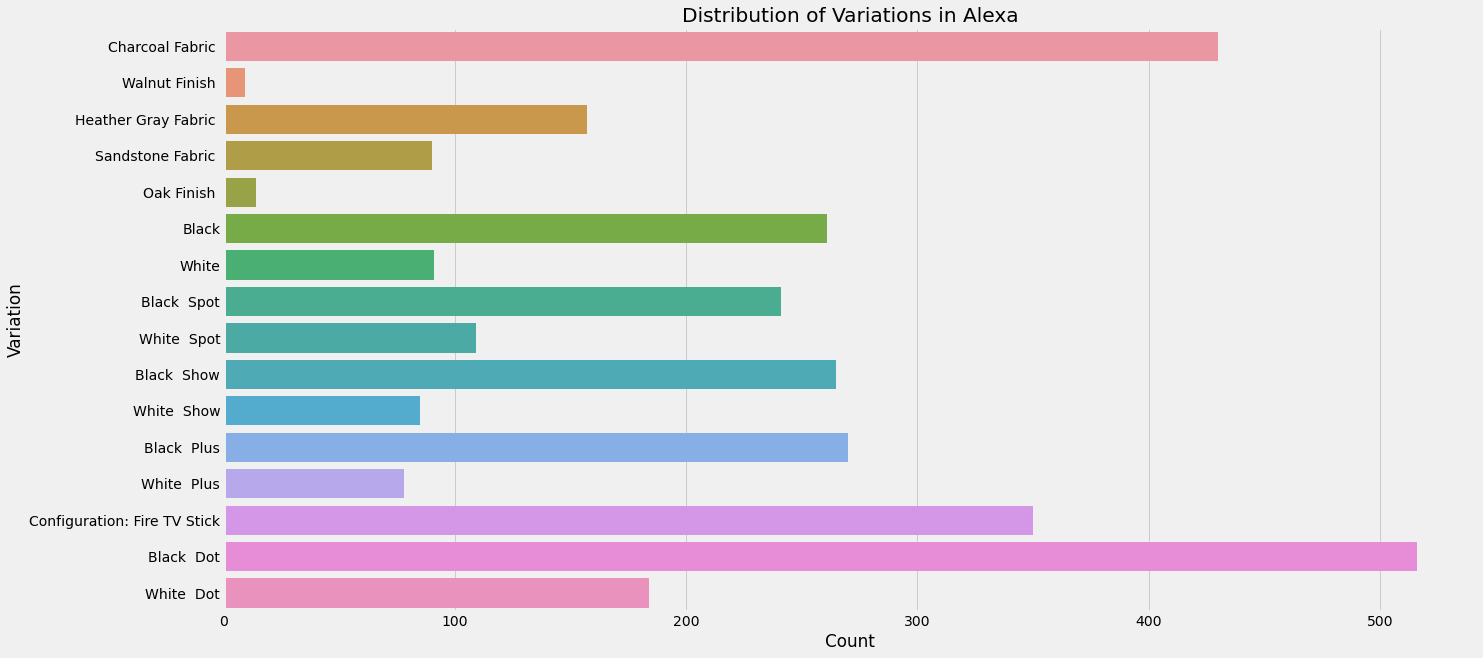

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.countplot(y='variation',data=df)
plt.title("Distribution of Variations in Alexa")
plt.xlabel("Count")
plt.ylabel("Variation")

In [ ]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot:xlabel='feedback', ylabel='count'>

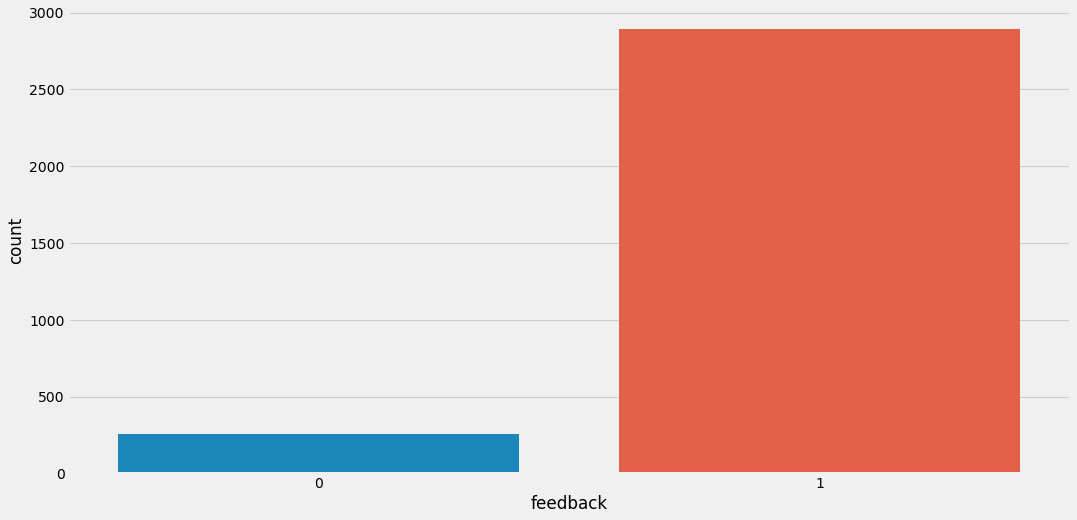

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot('feedback',data=df)


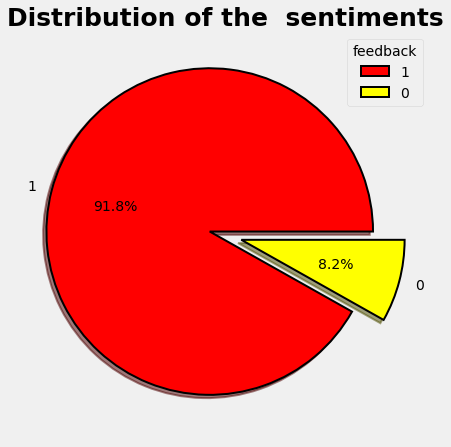

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("red","yellow")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1)
tags=df['feedback'].value_counts()
tags.plot(kind='pie',autopct="%0.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="feedback")
plt.title('Distribution of the  sentiments',fontsize='25',fontweight='bold')
plt.show()

In [ ]:
feedbacks = df['feedback'].value_counts()
feedbacks

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
df['length'].value_counts()

1      81
11     48
13     44
8      41
18     37
       ..
395     1
326     1
398     1
321     1
353     1
Name: length, Length: 490, dtype: int64

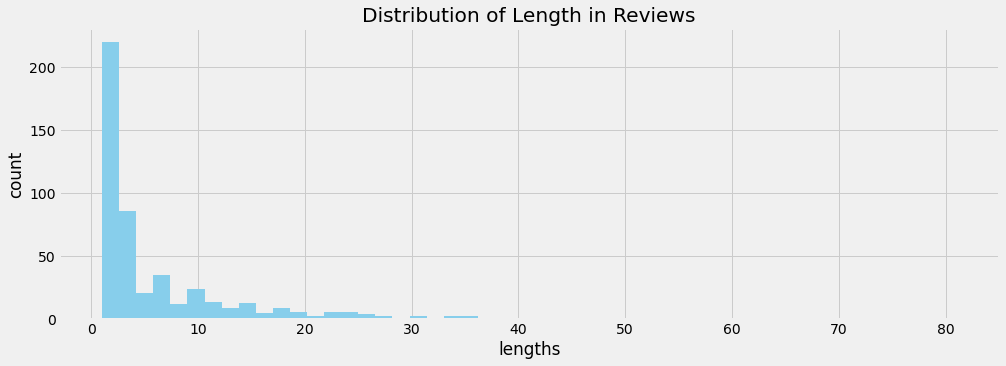

In [ ]:
df['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

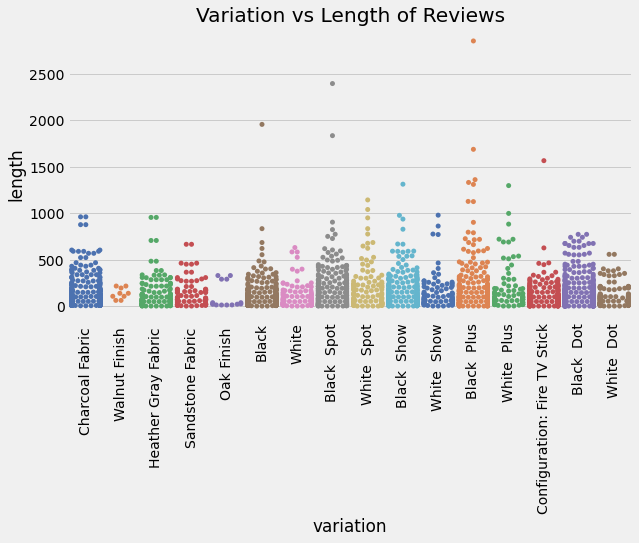

In [ ]:
plt.rcParams['figure.figsize'] = (9, 5)
sns.swarmplot(df['variation'], df['length'], palette = 'deep')#Deep color palette
plt.title("Variation vs Length of Reviews")
plt.xticks(rotation = 90)#x axis label rotation
plt.show()

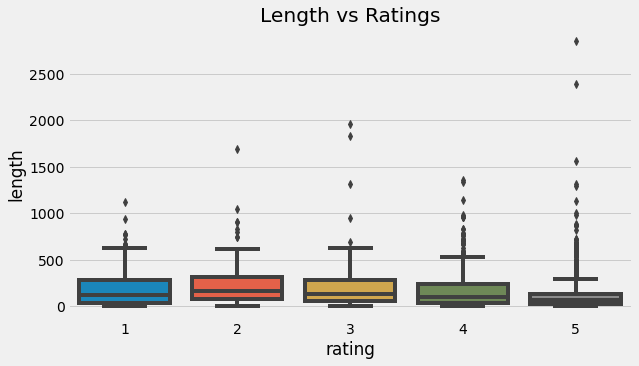

In [ ]:
plt.rcParams['figure.figsize'] = (9, 5)
sns.boxplot(df['rating'], df['length'])
plt.title("Length vs Ratings")
plt.show()

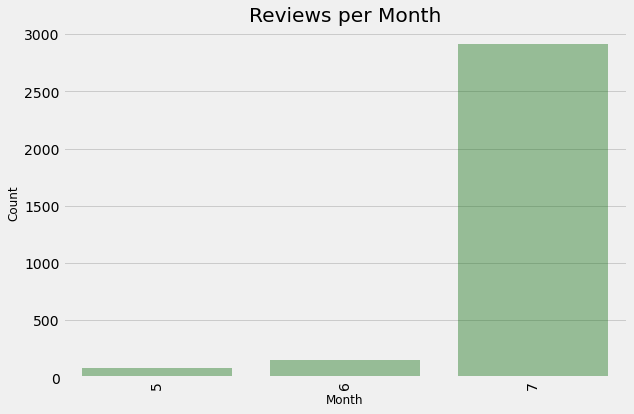

In [ ]:
import datetime
rating_review=df.sort_values(by='rating',ascending=False)#sorts the DataFrame by the rating
rating_review.head()
rating_review['date'] = pd.to_datetime(rating_review['date'], errors='coerce')#'coerce' to replace any invalid dates with NaT (Not a Time).
month_count = rating_review['date'].dt.month.value_counts()
month_count = month_count.sort_index()
plt.figure(figsize=(9,6))
sns.barplot(month_count.index, month_count.values,color='green',alpha=0.4)
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Reviews per Month")
plt.show()

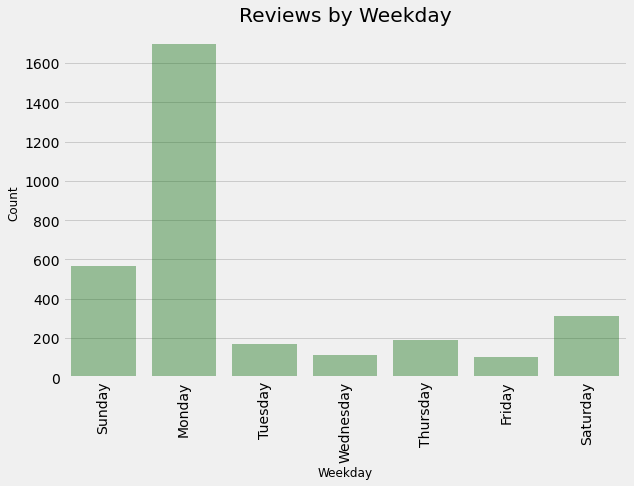

In [ ]:
# Convert the date column to datetime
df["rating_review"]= df['date'].apply(lambda x: datetime.datetime.strptime(x, "%d-%b-%y"))
# Extract the weekday
df['weekday'] = df['rating_review'].apply(lambda x: x.strftime("%A"))
# Count the number of reviews by weekday
weekday_count = df['weekday'].value_counts()
weekday_count = weekday_count.sort_index()
# Plot the count of reviews by weekday
plt.figure(figsize=(9,6))
sns.barplot(weekday_count.index, weekday_count.values, color='green', alpha=0.4, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation='vertical')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Reviews by Weekday")
plt.show()


In [ ]:
#analysing positive reviews
pdata=df[df.rating!=1]
pdata=pdata[pdata.rating!=2]

In [ ]:
pdata.head()

,rating,date,variation,verified_reviews,feedback,length,rating_review,weekday
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,2018-07-31,Tuesday
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2018-07-31,Tuesday
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,2018-07-31,Tuesday
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,2018-07-31,Tuesday
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,2018-07-31,Tuesday


In [ ]:
pdata.tail()

,rating,date,variation,verified_reviews,feedback,length,rating_review,weekday
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,2018-07-30,Monday
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,2018-07-30,Monday
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,2018-07-30,Monday
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,2018-07-30,Monday
3149,4,29-Jul-18,Black Dot,Good,1,4,2018-07-29,Sunday


In [ ]:
pdata_1=pdata[pdata.feedback==1]
pdata_1

,rating,date,variation,verified_reviews,feedback,length,rating_review,weekday
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,2018-07-31,Tuesday
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2018-07-31,Tuesday
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,2018-07-31,Tuesday
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,2018-07-31,Tuesday
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,2018-07-31,Tuesday
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,2018-07-30,Monday
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,2018-07-30,Monday
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,2018-07-30,Monday
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,2018-07-30,Monday


In [ ]:
ndata=df[df.rating!=4]
ndata=ndata[ndata.rating!=5]

In [ ]:
ndata_2=ndata[ndata.feedback==0]
ndata_2

,rating,date,variation,verified_reviews,feedback,length,rating_review,weekday
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163,2018-07-30,Monday
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53,2018-07-30,Monday
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18,2018-07-30,Monday
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87,2018-07-30,Monday
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20,2018-07-30,Monday
...,...,...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120,2018-07-30,Monday
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37,2018-07-30,Monday
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240,2018-07-30,Monday
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17,2018-07-30,Monday


#  NLP

### PreProcessing Steps of Text Data

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(pdata.verified_reviews)
words#sparse matrix of token counts

<2893x3395 sparse matrix of type '<class 'numpy.int64'>'
	with 28959 stored elements in Compressed Sparse Row format>

In [ ]:
#calculates the total count of each word across all the documents (reviews) in the matrix.
sum_words = words.sum(axis=0)#sum should be taken across the rows
sum_words
#1D array where each element represents the total count of a unique word in all the documents combined.
# The position of each element in the array corresponds to the index of the corresponding word in the vocabulary generated by the CountVectorizer instance.

matrix([[ 4, 17, 12, ...,  1,  1,  1]], dtype=int64)

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq
#a list of tuples where each tuple contains a word from the vocabulary generated by the CountVectorizer
#instance and its corresponding total count across all documents (reviews) in the matrix.

[('love', 949),
 ('echo', 747),
 ('loved', 41),
 ('playing', 69),
 ('game', 2),
 ('answer', 26),
 ('question', 7),
 ('correctly', 7),
 ('alexa', 578),
 ('says', 19),
 ('got', 115),
 ('wrong', 10),
 ('answers', 15),
 ('like', 461),
 ('able', 99),
 ('turn', 76),
 ('lights', 92),
 ('away', 25),
 ('home', 200),
 ('lot', 70),
 ('fun', 153),
 ('thing', 104),
 ('yr', 3),
 ('old', 43),
 ('learns', 8),
 ('dinosaurs', 1),
 ('control', 67),
 ('play', 190),
 ('games', 28),
 ('categories', 1),
 ('nice', 91),
 ('sound', 312),
 ('music', 508),
 ('received', 16),
 ('gift', 49),
 ('needed', 24),
 ('bluetooth', 47),
 ('easily', 29),
 ('accessible', 2),
 ('smart', 171),
 ('speaker', 216),
 ('wait', 15),
 ('having', 121),
 ('cellphone', 2),
 ('use', 436),
 ('features', 58),
 ('ipad', 4),
 ('great', 711),
 ('alarm', 103),
 ('deaf', 2),
 ('hear', 47),
 ('bedroom', 77),
 ('living', 36),
 ('room', 127),
 ('reason', 25),
 ('ask', 99),
 ('random', 8),
 ('questions', 61),
 ('response', 15),
 ('does', 118),
 ('sm

In [ ]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq



[('love', 949),
 ('echo', 747),
 ('great', 711),
 ('alexa', 578),
 ('music', 508),
 ('like', 461),
 ('use', 436),
 ('works', 358),
 ('easy', 341),
 ('sound', 312),
 ('just', 291),
 ('set', 286),
 ('good', 262),
 ('dot', 246),
 ('speaker', 216),
 ('product', 216),
 ('home', 200),
 ('amazon', 196),
 ('play', 190),
 ('smart', 171),
 ('really', 167),
 ('new', 167),
 ('34', 167),
 ('bought', 165),
 ('time', 162),
 ('better', 160),
 ('device', 159),
 ('fun', 153),
 ('quality', 152),
 ('prime', 150),
 ('day', 138),
 ('far', 137),
 ('don', 129),
 ('things', 128),
 ('room', 127),
 ('having', 121),
 ('does', 118),
 ('got', 115),
 ('house', 115),
 ('tv', 113),
 ('learning', 112),
 ('work', 111),
 ('plus', 110),
 ('devices', 110),
 ('little', 105),
 ('thing', 104),
 ('alarm', 103),
 ('weather', 101),
 ('able', 99),
 ('ask', 99),
 ('lights', 92),
 ('nice', 91),
 ('using', 91),
 ('voice', 90),
 ('spot', 90),
 ('used', 87),
 ('clock', 87),
 ('need', 87),
 ('video', 87),
 ('screen', 86),
 ('amazing', 

In [ ]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head()

,word,freq
0,love,949
1,echo,747
2,great,711
3,alexa,578
4,music,508


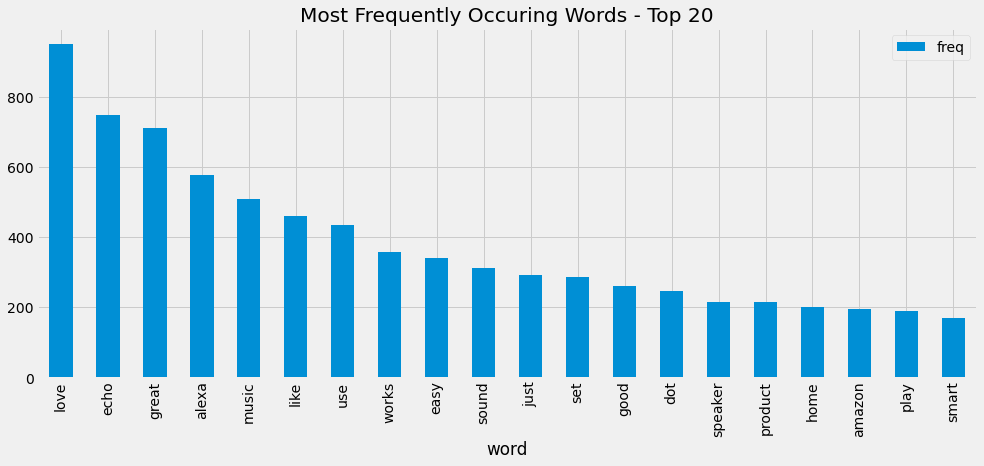

In [ ]:
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

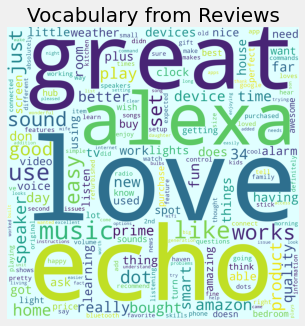

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [ ]:
pos_reviews=df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


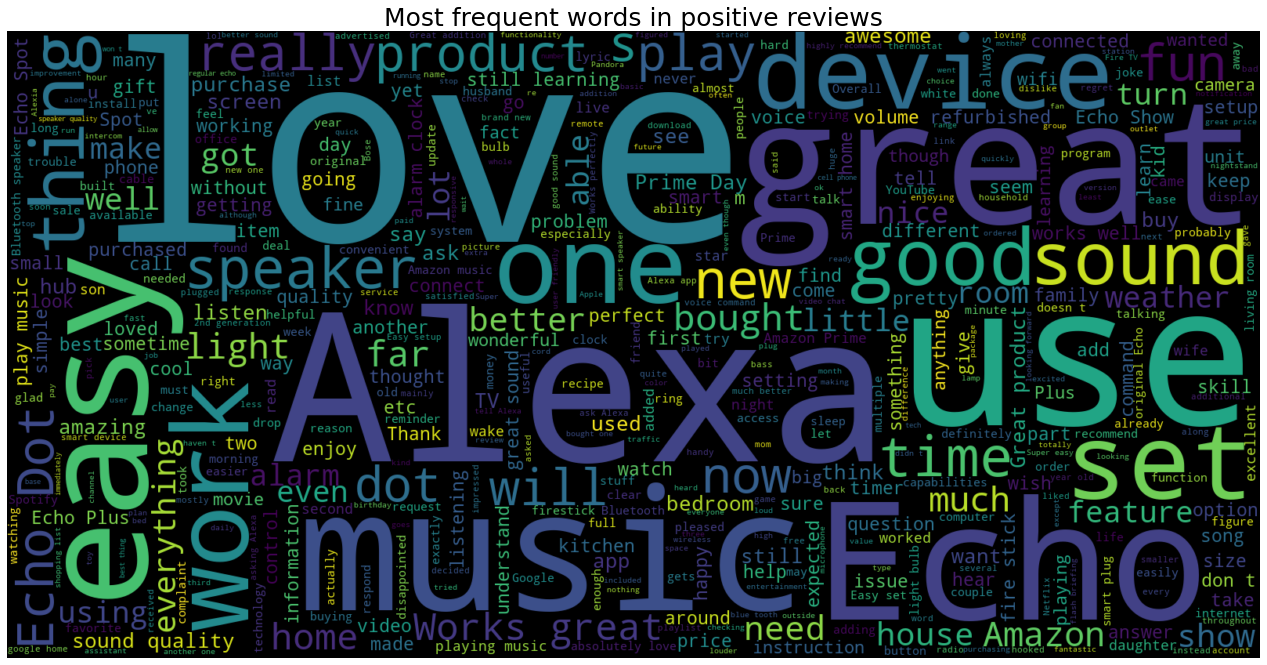

In [ ]:

text=' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15),facecolor='None')#20,15
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

In [ ]:
neg_reviews=df[df.feedback==0]
neg_reviews.head()


,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


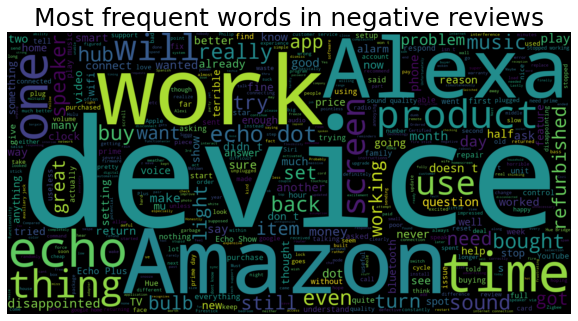

In [ ]:
text=' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(9,9),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=25)
plt.show()


In [ ]:
# Choose the column to check for contractions
column = "verified_reviews"
contraction_reviews=[]

# Loop over elements of the column
for i, row in df.iterrows():
    if "'" in row[column]:
         contraction_review=f"Contraction found in row {i}: {row[column]}"
         contraction_reviews.append(contraction_review)

for contraction_review in contraction_reviews[:5]:
    print(contraction_review)

Contraction found in row 7: I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.
Contraction found in row 11: I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it's been easy to use and understand. She does make me laugh at times
Contraction found in row 19: I liked the original Echo. This is the same but shorter and with greater fabric/color choices. I miss the volume ring on top, now it's just the plus/minus buttons. Not a big deal but the ring w as comforting. :) Other than that, well I do like the use of a standard USB charger /port instead of the previous round pin. Other than that, I guess it sounds the same, seems to work the same, still answers to Alexa/Echo/Computer. So what's not to like? :)
Contraction found in row 21: We love Alexa! We use her to play music, 

In [ ]:
#remove contractions on the dataset
def expand_contractions(text, contraction_dict):
    words = text.split()
    expanded_words = [contraction_dict.get(word, word) for word in words]
    print(expanded_words)
    return " ".join(expanded_words)

In [ ]:
def expand_reviews(df, contraction_dict):
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: expand_contractions(x, contraction_dict))
    return df

In [ ]:
contraction_dict = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [ ]:
df = expand_reviews(df, contraction_dict)

['Love', 'my', 'Echo!']
['Loved', 'it!']
['Sometimes', 'while', 'playing', 'a', 'game,', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you.', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home.']
['I', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing.', 'My', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs,', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories.', 'Has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well.']
['Music']
['I', 'received', 'the', 'echo', 'as', 'a', 'gift.', 'I', 'needed', 'another', 'Bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible,', 'and', 'found', 'this', 'smart', 'speaker.', 'Can’t', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do.']
['Without', 'having', 'a', 'cellphone,', 'I', 'cannot', 'use', 'many', 'of', 'her', 'features

In [ ]:
#find emoticons in a dataset
def check_smileys(text):
  smiley_regex = r"(?:X|:|;|=)(?:-)?(?:\)|\(|O|D|P)"
  return len(re.findall(smiley_regex, text)) > 0

# Add a new column to the dataset indicating if there are Emoticons in the review
df["has_smileys"] = df["verified_reviews"].apply(check_smileys)

# Print the first 5 rows of the updated dataset
smiley_reviews = df[df['has_smileys'] == True]
print(smiley_reviews.head())

     rating       date          variation  \
19        4  30-Jul-18  Sandstone Fabric    
248       3  29-Jul-18   Charcoal Fabric    
379       5  26-Jul-18              White   
571       5  11-Jun-18              Black   
602       4   5-Jun-18              Black   

                                      verified_reviews  feedback  length  \
19   I liked the original Echo. This is the same bu...         1     451   
248  I bought this to replace a &#34;Dot&#34; in my...         1     368   
379       LOVE LOVE LOVE my new and free assistant! :)         1      45   
571  I took a chance on a certified refurbished uni...         1     684   
602  This is a great device. We mainly use it to ve...         1     833   

     has_smileys  
19          True  
248         True  
379         True  
571         True  
602         True  


In [ ]:
#finding the emoji's Smilies by importing counter

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def extract_emojis(text):
    return re.findall(emoji_pattern, text)

emojis = []
for text in df['verified_reviews']:
    emojis += extract_emojis(text)

emoji_frequency = Counter(emojis)

print(emoji_frequency)

Counter({'👍🏻': 3, '😂': 3, '😍': 2, '😁😁😁😁': 2, '👍': 2, '👍🏾': 1, '😬': 1, '️': 1, '😍💋💋💋💋❤': 1, '😉': 1, '😊': 1, '🎶': 1, '😔': 1, '😑': 1, '😎': 1, '😳': 1, '❤️❤️': 1, '⭐⭐⭐⭐⭐': 1, '❤': 1, '😥': 1, '😏': 1, '😄😄': 1})


In [ ]:
# import emoji
UNICODE_EMOJI = {'👍🏻': 'Thumbs Up', '😂': 'Face with Tears of Joy', '👍':'Thumbs Up' , '😍': 'Smiling_Face_With_Heart-Shaped Eyes', '😁😁😁😁': 'Beaming Face with Smiling Eyes', '👍🏾': 'Thumbs Up', '😬':'Grimacing Face ', '😍💋💋💋💋❤': 'Smiling Face_With Heart-Shaped Eyes_Kiss Marks_red heart',
                 '😉': 'Winking Face','😊': 'positive feelings', '🎶':'music', '😔':'remorseful face', '😑': 'Expressionless', '😎': ' cool', '😳': ' Flushed', '❤️❤️': 'heart', '⭐⭐⭐⭐⭐': 'five_star', '❤': 'heart', '😥':'Disappointed but Relieved Face','😏': 'Smirk Emoji', '😄😄':'grinning face with smiling eyes' }
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, ' '+"_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split())+' ')
    return text
#The function loops over the keys in the dictionary and replaces each emoji symbol in the input text with its corresponding word, with words separated by underscores.

# Function for converting emoticons into word
EMOTICONS_EMO = {':)':'Happy or smiling face', ':-)':'Happy or smiling face',';)':'Winking face',';-)':'Winking face', ':(':'Sad face', ':-(':'Sad face', ':-D':'Grinning face with a big smile', ':D':'Grinning face with a big smile'}
def convert_emoticons(text):
    for i,v in EMOTICONS_EMO.items():
        if i in text:
            text = text.replace(i,"_".join(v.replace(",","").split()))
            break
    return text
#The function loops over the keys in the dictionary and replaces the first emoticon symbol found in the input text with its corresponding word.
#The break statement after the replace is used to replace only the first emoticon found, to avoid multiple replacements of the same symbol.

In [ ]:
df["verified_reviews_clean"]=df["verified_reviews"].apply(convert_emojis)
df["verified_reviews_clean"]=df["verified_reviews_clean"].apply(convert_emoticons)

In [ ]:
#check if all emoticons are replaced
df[df['has_smileys'] == True]
print('All Emoticons are Replaced')

All Emoticons are Replaced


In [ ]:
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews_clean'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus
   # Removes any characters that are not letters using a regular expression substitution.
    #Converts all text to lowercase.
    #Splits the text into individual words.
    #Removes any stop words using the NLTK library's list of English stop words.
    #Stems each remaining word using the Porter stemming algorithm.
    #Joins the stemmed words back into a single string.
   #Appends the processed text to a list called 'corpus'.

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [ ]:
df.iloc[59:62]

,rating,date,variation,verified_reviews,feedback,length,has_smileys,verified_reviews_clean
59,5,30-Jul-18,Charcoal Fabric,Love the echo I purchased it for company for m...,1,170,False,Love the echo I purchased it for company for m...
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1,False,Smiling_Face_With_Heart-Shaped_Eyes
61,5,30-Jul-18,Charcoal Fabric,Love being able to listen to music easily. Sti...,1,84,False,Love being able to listen to music easily. Sti...


In [ ]:
cv = CountVectorizer(max_features = 2500)
cv

CountVectorizer(max_features=2500)

## Data Splitting

In [ ]:
x = cv.fit_transform(corpus).toarray()
#The resulting x matrix will contain the count of each word in the corpus data, and the y array will contain the target values.
y = df.iloc[:, 4].values
cv.vocabulary_

{'love': 1309,
 'echo': 750,
 'sometim': 1973,
 'play': 1608,
 'game': 993,
 'answer': 119,
 'question': 1691,
 'correctli': 534,
 'alexa': 76,
 'say': 1803,
 'got': 1039,
 'wrong': 2473,
 'like': 1282,
 'abl': 4,
 'turn': 2284,
 'light': 1280,
 'away': 194,
 'home': 1122,
 'lot': 1306,
 'fun': 979,
 'thing': 2185,
 'yr': 2495,
 'old': 1480,
 'learn': 1267,
 'dinosaur': 672,
 'control': 518,
 'categori': 377,
 'nice': 1435,
 'sound': 1989,
 'music': 1396,
 'well': 2421,
 'receiv': 1721,
 'gift': 1016,
 'need': 1414,
 'anoth': 118,
 'bluetooth': 282,
 'someth': 1972,
 'easili': 747,
 'access': 11,
 'found': 963,
 'smart': 1936,
 'speaker': 2003,
 'wait': 2390,
 'see': 1828,
 'els': 777,
 'without': 2450,
 'cellphon': 386,
 'cannot': 359,
 'use': 2345,
 'mani': 1327,
 'featur': 902,
 'ipad': 1206,
 'great': 1058,
 'alarm': 71,
 'almost': 85,
 'deaf': 601,
 'hear': 1099,
 'bedroom': 234,
 'live': 1291,
 'room': 1782,
 'reason': 1718,
 'enough': 795,
 'keep': 1225,
 'ask': 161,
 'random': 

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2520, 2500)
(2520,)
(630, 2500)
(630,)


## Scaling

In [ ]:
min_max = MinMaxScaler()

x_train = min_max.fit_transform(x_train)
x_test = min_max.transform(x_test)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2520, 2500)
Size of y_train:  (2520,)
Size of x_test:  (630, 2500)
Size of y_test:  (630,)


#  Model Building

####  RandomForestClassifier

In [ ]:
#modelling
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_y = rf.predict(x_test)
rf_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(y_test, rf_y))
print('\n')
print(classification_report(y_test, rf_y))
from sklearn.metrics import accuracy_score
rf_test_acc=accuracy_score(y_test, rf_y)
print("Testing Accuracy :{:.2f}%".format(rf_test_acc*100))

[[ 16  39]
 [  2 573]]


              precision    recall  f1-score   support

           0       0.89      0.29      0.44        55
           1       0.94      1.00      0.97       575

    accuracy                           0.93       630
   macro avg       0.91      0.64      0.70       630
weighted avg       0.93      0.93      0.92       630

Testing Accuracy :93.49%


#### Logistic Regression

In [ ]:
#logistic regression
lgm=LogisticRegression()
lgm.fit(x_train, y_train)
lgm_y=lgm.predict(x_test)


In [ ]:

print(confusion_matrix(y_test, lgm_y))
print('\n')
print(classification_report(y_test, lgm_y))

from sklearn.metrics import accuracy_score
lgm_test_acc=accuracy_score(y_test, lgm_y)
print("Testing Accuracy :{:.2f}%".format(lgm_test_acc*100))


[[ 14  41]
 [  1 574]]


              precision    recall  f1-score   support

           0       0.93      0.25      0.40        55
           1       0.93      1.00      0.96       575

    accuracy                           0.93       630
   macro avg       0.93      0.63      0.68       630
weighted avg       0.93      0.93      0.92       630

Testing Accuracy :93.33%


#### Naive Bayes - MultinomialNB

In [ ]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_y=nb.predict(x_test)
nb_y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(y_test, nb_y))
print('\n')
print(classification_report(y_test, nb_y))
nb_test_acc=accuracy_score(y_test, nb_y)
print("Testing accuracy :{:.2f}%".format(nb_test_acc*100))

[[ 18  37]
 [  7 568]]


              precision    recall  f1-score   support

           0       0.72      0.33      0.45        55
           1       0.94      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.83      0.66      0.71       630
weighted avg       0.92      0.93      0.92       630

Testing accuracy :93.02%


#### SVM - SVC

In [ ]:
#SVM
svm = SVC()
svm.fit(x_train, y_train)
svm_y=svm.predict(x_test)
svm_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(y_test, svm_y))
print('\n')
print(classification_report(y_test, svm_y))


svm_test_acc=accuracy_score(y_test, svm_y)

print("Testing accuracy :{:.2f}%".format(svm_test_acc*100))

[[  7  48]
 [  0 575]]


              precision    recall  f1-score   support

           0       1.00      0.13      0.23        55
           1       0.92      1.00      0.96       575

    accuracy                           0.92       630
   macro avg       0.96      0.56      0.59       630
weighted avg       0.93      0.92      0.90       630

Testing accuracy :92.38%


#### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
knn_y=neigh.predict(x_test)
knn_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(y_test, knn_y))
print('\n')
print(classification_report(y_test, knn_y))

knn_test_acc=accuracy_score(y_test,knn_y)
print("Testing accuracy :{:.2f}%".format(knn_test_acc*100))

[[  4  51]
 [  5 570]]


              precision    recall  f1-score   support

           0       0.44      0.07      0.12        55
           1       0.92      0.99      0.95       575

    accuracy                           0.91       630
   macro avg       0.68      0.53      0.54       630
weighted avg       0.88      0.91      0.88       630

Testing accuracy :91.11%


#### Naive Bayes - GaussianNB

In [ ]:
gbn = GaussianNB( var_smoothing=0.1)
gbn.fit(x_train, y_train)
gbn_y=gbn.predict(x_test)
#gbn_y

In [ ]:
r = accuracy_score(y_test,gbn_y)
r

0.9063492063492063

In [ ]:
print(confusion_matrix(y_test, gbn_y))
print('\n')
print(classification_report(y_test, gbn_y))

gbn_test_acc=accuracy_score(y_test,gbn_y)
print("Testing accuracy:{:.2f}%".format(gbn_test_acc*100))

[[ 23  32]
 [ 27 548]]


              precision    recall  f1-score   support

           0       0.46      0.42      0.44        55
           1       0.94      0.95      0.95       575

    accuracy                           0.91       630
   macro avg       0.70      0.69      0.69       630
weighted avg       0.90      0.91      0.90       630

Testing accuracy:90.63%


#### Comparing Performance of each Model

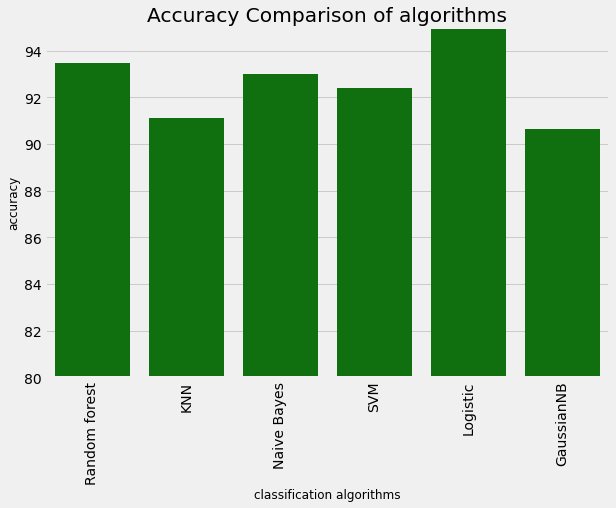

In [ ]:
plt.figure(figsize=(9,6))
acc=[rf_test_acc*100,knn_test_acc*100,nb_test_acc*100,svm_test_acc*100,lgm_test_acc*100*100,gbn_test_acc*100]
alg=["Random forest",'KNN','Naive Bayes','SVM','Logistic','GaussianNB']
plt.ylim(80,95)

sns.barplot(alg, acc,color='green')
plt.xticks(rotation='vertical')

plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

In [ ]:
L=[rf,neigh,nb,svm,gbn,lgm]
te=[]
for i in L:
    te.append(round(accuracy_score(y_test,i.predict(x_test))*100,2))

print(te)

[93.49, 91.11, 93.02, 92.38, 90.63, 93.33]


In [ ]:
a=pd.DataFrame({"Model_name":["Random forest",'KNN','MultinomialNB','SVC','GaussianNB','Logistic'],"testing accuracy":te})
a

,Model_name,testing accuracy
0,Random forest,93.49
1,KNN,91.11
2,MultinomialNB,93.02
3,SVC,92.38
4,GaussianNB,90.63
5,Logistic,93.33


# Prediction using Outside Data

In [ ]:
def prediction(Text):

    treview = re.sub('[^a-zA-Z]', ' ',Text )
    treview = treview.lower()
    treview = treview.split()
    tps = PorterStemmer()
    treview = [tps.stem(word) for word in treview if  word not in set(stopwords.words('english'))]
    treview = ' '.join(treview)
    corpus.insert(0,treview)
    tcv = CountVectorizer(max_features = 2500)
    v=tcv.fit_transform(corpus).toarray()
    p=gbn.predict(v[0:1])

    return p
prediction("""Very satisfied with the Echo. Alexa now controls the lights in my family room and my
wife can listen to Jimmy Buffet by just asking Alexa.""")



array([1], dtype=int64)

In [ ]:
prediction("i hate hate hate")

array([0], dtype=int64)

In [ ]:
prediction(input("Enter a review:"))

Enter a review:i love
This is the review: [1]
It is a positive review


In [ ]:
while(True):
    print("Commands:")
    print("1.Start")
    print("2. End")
    def prediction(Text):
        treview = re.sub('[^a-zA-Z]', ' ',Text )
        treview = treview.lower()
        treview = treview.split()
        tps = PorterStemmer()
        treview = [tps.stem(word) for word in treview if  word not in set(stopwords.words('english'))]
        treview = ' '.join(treview)
        corpus.insert(0,treview)
        tcv = CountVectorizer(max_features = 2500)
        v=tcv.fit_transform(corpus).toarray()
        p=gbn.predict(v[0:1])
        print("This is the review:",p)
        if p==1:
            print("It is a positive review")
        else:
            print("It is a negative review")
    c=int(input("Enter a command:"))
    if c==2:
        print("prediction stoped,Thank you")
        break
    Text=input("Enter a Text to check review")
    if c==1:
        prediction(Text)

Commands:
1.Start
2. End
Enter a command:1
Enter a Text to check reviewi love love alexa
This is the review: [1]
It is a positive review
Commands:
1.Start
2. End
Enter a command:1
Enter a Text to check reviewi hate hate alexa devices
This is the review: [0]
It is a negative review
Commands:
1.Start
2. End
Enter a command:1
Enter a Text to check reviewAlexa not works well
This is the review: [1]
It is a positive review
Commands:
1.Start
2. End
Enter a command:2
prediction stoped,Thank you
